---
layout: single
title: 'Acquiring streamflow data from USGS with climata and Python'
date: 2016-07-08
authors: [Max Joseph]
category: [tutorials]
excerpt: 'This tutorial demonstrates how to use climata to acquire streamflow data in and around Boulder, Colorado.'
sidebar:
  nav:
author_profile: false
comments: true
lang: [python]
lib: [matplotlib, climata, pandas, numpy]
---

Climata is a python package aimed at acquiring climate and water flow data from a variety of organizations including NOAA, CoCoRaHS, USBR, NWS, NRCS, and USGS. 
Here, we'll use climata to acquire streamflow data in and around Boulder, Colorado.

## Objectives

- Extracting stream flow data for a specific USGS station ID
- Extracting stream flow data for a county by FIPS code

## Dependencies


- [climata](https://github.com/heigeo/climata)

Many data queries are possible through climata, some of which are demonstrated [here](http://climata.houstoneng.net/datarequests/).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np

register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Extracting data for a specific USGS station ID

To acquire station data, you must know which station you want to access. 
There is a nice interactive application [here](http://maps.waterdata.usgs.gov/mapper/){:data-proofer-ignore=''} to do this. 

In [2]:
# set parameters
nyears = 10
ndays = 365 * nyears
station_id = "06730200"
param_id = "00060"

datelist = pd.date_range(end=pd.datetime.today(), periods=ndays).tolist()
data = DailyValueIO(
    start_date=datelist[0],
    end_date=datelist[-1],
    station=station_id,
    parameter=param_id,
)

In [3]:
# create lists of date-flow values
for series in data:
    flow = [r[1] for r in series.data]
    dates = [r[0] for r in series.data]

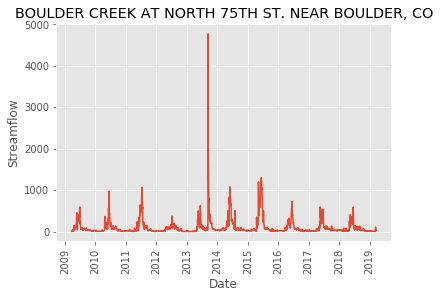

In [4]:
plt.plot(dates, flow)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title(series.site_name)
plt.xticks(rotation='vertical')
plt.show()

Note that the flooding in 2013 is fairly apparent.

## Extracting data for a county using a FIPS code

If we want data for all stations within a county, we need to query using the county FIPS code. 
The FIPS code for Boulder, CO is 08013:

In [5]:
# set parameters
nyears = 1
ndays = 365 * nyears
county = "08013"
datelist = pd.date_range(end=pd.datetime.today(), periods=ndays).tolist()

data = DailyValueIO(
    start_date=datelist[0],
    end_date=datelist[-1],
    county=county,
)

date = []
value = []

for series in data:
    for row in series.data:
        date.append(row[0])
        value.append(row[1])

In [6]:
site_names = [[series.site_name] * len(series.data) for series in data]

# unroll the list of lists
flat_site_names = [item for sublist in site_names for item in sublist]

In [7]:
# bundle the data into a data frame
df = pd.DataFrame({'site': flat_site_names, 
                   'date': date, 
                   'value': value})

# remove missing values
df = df[df['value'] != -999999.0]

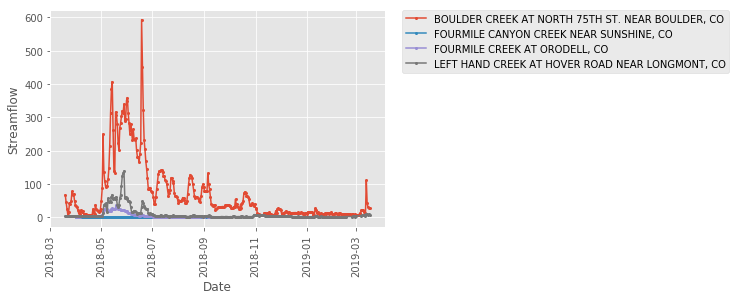

In [8]:
# visualize flow time series, coloring by site
groups = df.groupby('site')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.date, group.value, marker='o', linestyle='-', ms=2, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.xticks(rotation='vertical')
plt.show()

Note that there are gaps in the data, where points do not occur. 
Lines bridge areas lacking data.